<span style="color:red">Exam Grade: 26.5</span>

  Q 1: 10.0

  Q 2: 5.5

  Q 3: 10.0

  Q 4: 1.0

  Exam grade is average of question grades. 

  Comments: 
      
      1.1) 10/10
      1.2) 10/10
      1.3) 10/10

Q2 comments: 2.1: Perfect (4/4). 2.2: Used polyfit instead of computing least squares fit yourself. Didn't construct polynomials. (1.5/4) 2.3: Not attempted. (0/2)

# Final Exam PHYS248/MATH248
**Saturday April 14th, 2018, 9am - 12pm (3 hrs)**

You are free to use all the course resources, as well as internet sources such as Python documentation web-pages and web search results. You must not have any communications by any means with people, other than the exam invigilators. 

If not explicitly stated otherwise, you are free to choose whichever library to use, including your own modules.  If you do use your own module, include it in your final exam directory.

Save your final exam (early and often!) in your Bitbucket repository, in `mp248/final/final.ipynb`.

Please include any other files or modules you will need to make your i-python notebook run in the `mp248/final` directory.

* * *

## Problem 1

### 1.1
In the `Quizzes_Assignments_Exams` directory you will find a file `sunspots.txt` which contains the observed number of sunspots for each month since 1749. Copy that file into the `final` directory of your repo and commit it along with the other file(s) to your repository. The file contains two columns with the month number and the sunspot number.

Read the data and make a graph as a function of time.  The arrays for month and number of sunspots are to be called `month` and `nr_sunsp`. Determine how many data point pairs are in the data set and print that number out embedded in a complete and formatted sentence.

Create down sampled data sets `month_sparse` and `nr_sunsp_sparse` by retaining only every $15^\mathrm{th}$ data pair. In other words, keep the first data pair, then skip 14, then keep the 15th, and so on.

Plot both the down-sampled data set and the original data set for month 900 to 1700.

In [16]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [4]:
sunspots = loadtxt('sunspots.txt').T

In [14]:
month = sunspots[0].astype(int)
nr_sunsp = sunspots[1].astype(float)

<IPython.core.display.Javascript object>


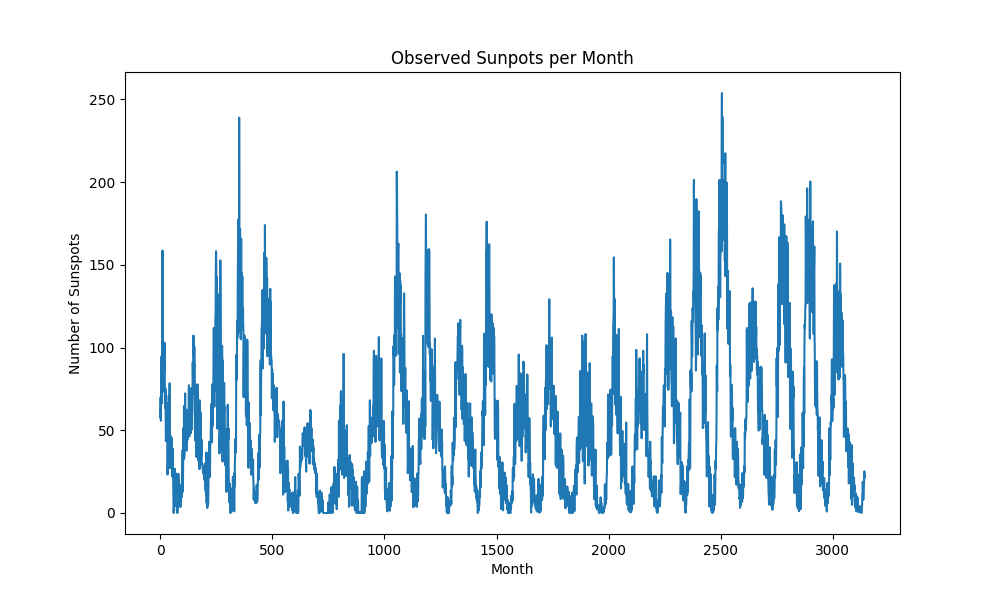

In [29]:
plt.figure(figsize = (10,6))
plt.plot(month,nr_sunsp)
xlabel("Month")
ylabel("Number of Sunspots")
title("Observed Sunpots per Month")
plt.show()

In [35]:
data_num = len(sunspots[0])
print("There are %d data point pairs are in the data set." %data_num)

There are 3143 data point pairs are in the data set.


In [48]:

month_sparse = []
nr_sunsp_sparse = []

for i in range(0,data_num,15):
    month_sparse.append(month[i].astype(int))
    nr_sunsp_sparse.append(nr_sunsp[i].astype(float))

In [168]:
len(month_sparse), len(nr_sunsp_sparse)
#month_sparse[1], nr_sunsp_sparse[1]

(210, 210)

In [169]:
x = []
y = []
for i in range(len(month_sparse)):
    if month_sparse[i]>900 and month_sparse[i]<1700:
        x.append(month_sparse[i])
        y.append(nr_sunsp_sparse[i])


<IPython.core.display.Javascript object>


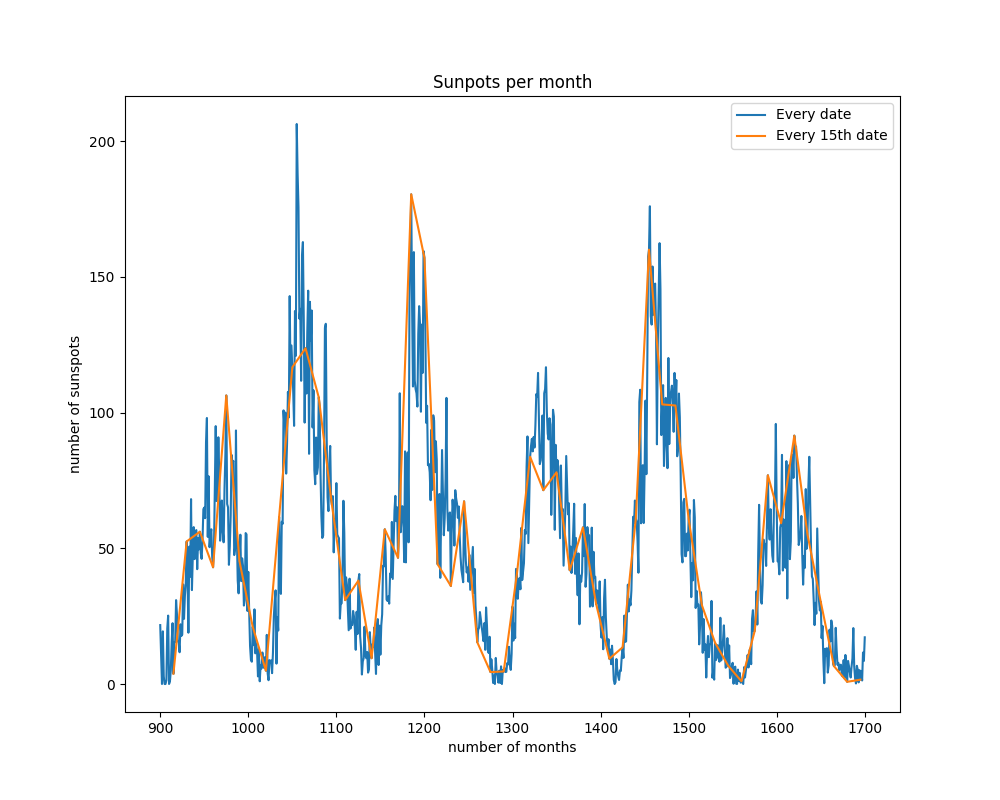

In [171]:
plt.close()
plt.figure(figsize = (10,8))
plt.plot([month[x] for x in range(900,1701)], [nr_sunsp[x] for x in range(900,1701)], label = "Every date")
plt.plot(x,y, label = "Every 15th date")
xlabel("number of months")
ylabel("number of sunspots")
title("Sunpots per month")
legend(loc=0)
plt.show()

### 1.2
Plot a histogram of the number of all sunspots with 10 bins. This shows the number times the measured number of sunspots is in each of the 10 sunspot number bins. Extract the data points of the distribution function and overplot with single dots. Make sure that these dots are properly centered for each bin.

<IPython.core.display.Javascript object>


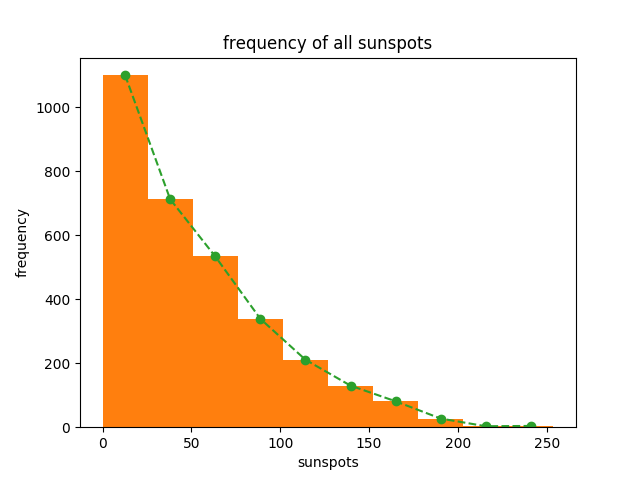

In [97]:
plt.close()
hist(nr_sunsp)
xlabel("sunspots"); ylabel("frequency"); title("frequency of all sunspots")
plt.show()

In [191]:
n=10
ah=hist(nr_sunsp.flatten(),n)
y=ah[0]
x=ah[1][0:-1]+0.5*diff(ah[1])
plt.plot(x,y,'o--')

### 1.3
Fit the sunspot distribution function. Perform a least-square fit of an exponential with three parameters
$$
P_\mathrm{spots}(x) = a e^{bx} +c
$$
where $x=N_\mathrm{spots}$ is the number of sunspots measured.

Plot the distribution function data and fit together. Round the fit parameters appropriately and write your final fit formula in a Markdown cell. 

In [237]:
plt.close()
from scipy.optimize import curve_fit

def model_func(x,a,b,c):
    '''
    for a least squares fit of exponential order, with 3 parameters:
    x - array like, float.
    a, b, c - constants, floats.
    '''
    return a*exp(b*x)+c

fitpars, covmat = curve_fit(model_func,x,y, p0=[1,-1,1000])
fitpars

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


array([  1.37298300e+03,  -1.41948530e-02,  -5.44204140e+01])

<IPython.core.display.Javascript object>


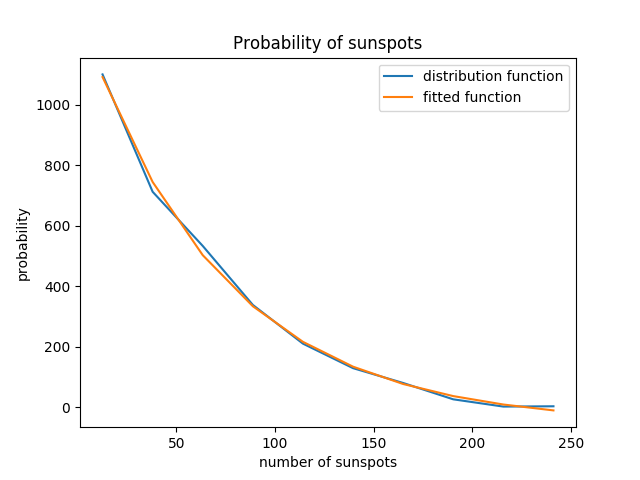

In [240]:
plt.plot(x,y, label = 'distribution function')
plt.plot(x, model_func(x,fitpars[0],fitpars[1],fitpars[2]),label='fitted function')
legend(loc=0)
xlabel("number of sunspots")
ylabel("probability")
title("Probability of sunspots")
plt.show()

In [241]:
model_func(x,fitpars[0],fitpars[1],fitpars[2]), y, x

(array([ 1092.23923   ,   745.3646072 ,   503.42260724,   334.67018922,
          216.96686119,   134.86982464,    77.60786338,    37.6681488 ,
            9.810549  ,    -9.61988196]),
 array([ 1101.,   713.,   534.,   339.,   211.,   130.,    81.,    27.,
            3.,     4.]),
 array([  12.69,   38.07,   63.45,   88.83,  114.21,  139.59,  164.97,
         190.35,  215.73,  241.11]))

## Problem 2

### 2.1
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ Taylor polynomial for the function $y(x) = sin(x^2)$, centred at $x_0 = 0$, i.e. $T_k(x) = \sum_{i=0}^k\frac{d^i y}{dx^i}(x=0)  \frac{x^i}{i!}$.  Print the output using a Sympy *pprint* command, for $k=2,6,10,14,15$.

### 2.2
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ polynomial *best fit* to $y(x) = sin(x^2)$ on the interval $[0,2\pi]$, using the least-squares technique. As in part 2.1, output your answers for $k=2,6,10,14,15$.

### 2.3
Write a function that takes as input a positive integer $k$.  Plot the function $y(x)=sin(x^2)$, together with the corresponding function from 2.1 and 2.2.  Include a legend.  For your $x$-bounds use the interval $[0, 2\pi]$, for the $y$-bounds use $[-1.2,1.2]$. Label your axis and give your plot an appropriate title (depending on $k$).  Include the plot for $k=10$ in your notebook. 

In [157]:
import sympy as sp
import numpy as np

def taylor(k):
    '''
    Computes the Taylor polynomial for the function y(x) = sin(x^2), centered at x =0, to the k-th degree
        using Sympy
    parameter: k, the degree
    returns: taylor polynomial
    '''
    
    x = sp.symbols('x')
    f = sp.sin(x**2)
    x0 = 0
    
    def factorial(n):
        if n <= 0:
            return 1
        else:
            return n*factorial(n-1)
    
    i = 0
    p = 0
    while i <= k:
        p = p + (f.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
        
    return sp.simplify(p)

In [158]:
for i in [2,6,10,14,15]:
    print("for k =", i)
    sp.pprint(taylor(i))
    print("\n")

for k = 2
 2
x 


for k = 6
   6     
  x     2
- ── + x 
  6      


for k = 10
 10    6     
x     x     2
─── - ── + x 
120   6      


for k = 14
   14     10    6     
  x      x     x     2
- ──── + ─── - ── + x 
  5040   120   6      


for k = 15
   14     10    6     
  x      x     x     2
- ──── + ─── - ── + x 
  5040   120   6      




In [291]:
def taylor_bestfit(k):
    import sympy as sp
    '''
    uses Sympy to compute the degree k  polynomial best fit to  y(x)=sin(x**2) 
    on the interval [0,2π], using the least-squares technique
    
    parameter:
        k - the degree
    returns:
        best fit polynomial to k-th degree
    '''
    n=50
    
    x = sp.symbols('x')
    f = sp.sin(x**2)
    
    F = sp.lambdify(x,f)
    
    x1 = [0,2*np.pi, n]
    y1 = [np.sin(i**2) for i in x1]
    
    coef = np.polyfit(x1,y1,k)
    
    
    return coef
    

In [293]:
for i in [2,6,10,14,15]:
    print("for k =", i)
    sp.pprint(taylor_bestfit(i))
    print("\n")

for k = 2
[ -3.85916235e-03   1.79955567e-01  -2.56395025e-15]


for k = 6
[ -1.28041853e-10  -6.39508928e-09  -3.16967897e-07  -1.47396056e-05
          -2.95758926e-04   1.58237784e-01  -1.79476517e-15]        


for k = 10
[ -1.10824291e-17  -5.54121204e-16  -2.77059605e-14  -1.38525835e-12
  -6.92471328e-11  -3.45607603e-09  -1.70304817e-07  -7.52090149e-06
           1.95720468e-05   1.55930079e-01  -2.30755522e-15]        


for k = 14
[ -1.21523632e-24  -6.07618159e-23  -3.03809079e-21  -1.51904538e-19
  -7.59522630e-18  -3.79761075e-16  -1.89879583e-14  -9.49359936e-13
  -4.74528853e-11  -2.36663157e-09  -1.15939197e-07  -4.84504556e-06
           1.36459948e-04   1.55074585e-01   1.41017264e-15]        


for k = 15
 [ -2.25322260e-26  -1.12661130e-24  -5.63305651e-23  -2.81652825e-21
   -1.40826411e-19  -7.04131995e-18  -3.52065759e-16  -1.76031932e-14
   -8.80121949e-13  -4.39910929e-11  -2.19358450e-09  -1.07303776e-07
  -4.42001333e-06   1.55026390e-04   1.54938699e-01   2

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


## Problem 3

The _Belousov-Zhabotinsky reaction_ is a chemcial oscillator, a cocktail of chemicals which, when heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to oscillate between two extremes. The following equations describe the evolution of the two concentrations in this chemical system:
$$
\frac{dx}{dt} = 1-(b+1)x+ax^2y\\
\frac{dy}{dt} = bx -ax^2y
$$
where $x$ and $y$ represent concentrations of two chemicals and $a$ and  $b$ are positive constants. 

Solve these equations (numerically) for $a=1$, $b=3$ with initial conditions $x=y=0$ and plot the solution. 

In [182]:
def belzha(x,y,a,b):
    '''
    Solves the Belousov-Zhabotinsky reaction equations
    x,y - arraylike, concentrations of the two chemicals
    a,b - positive constants
    '''
    xx = []
    yy = []
    tt = []
    
    t = 0;
    dt = 0.01 
    t_term = 50
    
    while t<t_term:
        xx.append(x)
        yy.append(y)
        tt.append(t)
        
        x +=dt*(1- (b+1)*x + a*x**2*y)
        y +=dt*(b*x - a*x**2*y)
        
        t+=dt
        
        if x == y:
            break
    
    return xx,yy,tt

<IPython.core.display.Javascript object>


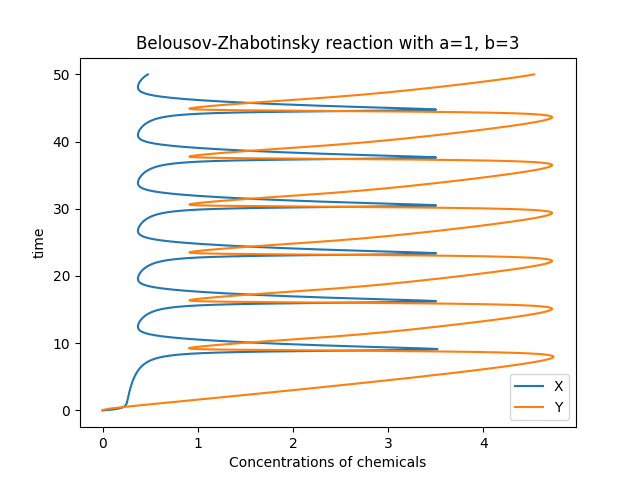

In [183]:
plt.close()
xx, yy, tt = belzha(0,0,1,3)

plt.plot(xx,tt, label="X")
plt.plot(yy,tt, label = "Y")
legend(loc=0)
xlabel("Concentrations of chemicals")
ylabel("time")
title("Belousov-Zhabotinsky reaction with a=1, b=3")

In [242]:
plt.close()

# Problem 4

In the `data` directory there is the text file `wdats.txt`. Copy this file into your `mp248/final` directory.   Each line of the file has a day of data for Victoria and Saskatoon.  The top line of the file explains the content of the remaining lines in the file.   In this problem we ask you to make a matplotlib interactive visualization of the data.

Use matplotlib `widgets` to control your interactive plot. Use a <a href="https://matplotlib.org/gallery/widgets/slider_demo.html">Slider</a> for the user to input the month as a number between 1 (January) and 12 (December).  Also have a <a href="https://matplotlib.org/gallery/widgets/radio_buttons.html">RadioButton</a> for the user to select between max, min and mean temperatures.

With the application running, when the user selects the month, and clicks on a radio button, the plot should update to show the temperatures for Victoria (horizontal axis) vs Saskatoon (vertical axis) for that month and with the convention chosen on the radio button.

This should be a properly interactive plot, that allows the user to dynamically change the month and radio button, with the plot automatically updating on every change.

If you find using the Slider or RadioButton feature difficult; rather than making an interactive plot, you could opt to make a callable function that takes two arguments: (1) the month as an integer between 1 and 12, and (2) a string 'Max', 'Min' or 'Mean'.  This function should then make the appropriate non-interactive Matplotlib plot, as described above.  Such an answer would receive (at best) a grade of 7/10.


In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

In [2]:
data = loadtxt('wdats.txt')

ValueError: could not convert string to float: b'Date,'